# Spam Email Assessment

## 1. Project Overview

The goal of this project is to classify emails as spam or not spam using various machine learning models. The data used for this analysis is sourced from https://www.kaggle.com/datasets/mfaisalqureshi/spam-email

## 2. Imports

In [16]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
import time
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

## 3. Data Loading

In [7]:
# Load data from datasets folder
spam = pd.read_csv('./datasets/spam.csv')
spam.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


## 4. Data Inspection

In [8]:
# Checking information of the data
spam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


**Observation**:

- No missing values

In [9]:
# Checking the total categories available
spam['Category'].unique()

array(['ham', 'spam'], dtype=object)

## 5. Data Preprocessing

In [13]:
# Converting the Category column to binary
spam['Spam'] = spam['Category'].map({'spam': 1, 'ham': 0})

# Lowercasing
spam['Message'] = spam['Message'].str.lower()

# Removing punctuation
spam['Message'] = spam['Message'].str.replace(f"[{string.punctuation}]", " ", regex=True)

# Tokenization
nltk.download('punkt')
spam['Message'] = spam['Message'].apply(word_tokenize)

# Removing stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
spam['Message'] = spam['Message'].apply(lambda x: [word for word in x if word not in stop_words])

# Rejoining the words back into a string
spam['Message'] = spam['Message'].apply(lambda x: ' '.join(x))


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [14]:
# View dataset after preprocessing
spam.head()

,Category,Message,Spam
0,ham,go jurong point crazy available bugis n great ...,0
1,ham,ok lar joking wif u oni,0
2,spam,free entry 2 wkly comp win fa cup final tkts 2...,1
3,ham,u dun say early hor u c already say,0
4,ham,nah n think goes usf lives around though,0


## 6. Feature Extraction

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer()
X = tfidf_vectorizer.fit_transform(spam['Message'])
y = spam['Spam']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## 7. Modeling

### Model Training

In [19]:
# Define the models
models = {
    'Logistic Regression': LogisticRegression(),
    'Naive Bayes': MultinomialNB(),
    'SVM': SVC(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'KNN': KNeighborsClassifier()
}

# Initialize storage for results
results = {}

for name, model in models.items():
    start_time = time.time()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    end_time = time.time()
    
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)
    runtime = end_time - start_time
    
    # Store results
    results[name] = {
        'model': model,
        'accuracy': accuracy,
        'confusion_matrix': conf_matrix,
        'classification_report': class_report,
        'runtime': runtime
    }
    
    # Print the results
    print(f"Model: {name}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Runtime: {runtime:.4f} seconds")
    print(f"Confusion Matrix:\n{conf_matrix}")
    print(f"Classification Report:\n{class_report}")
    print("-" * 30)

Model: Logistic Regression
Accuracy: 0.9575
Runtime: 0.0462 seconds
Confusion Matrix:
[[1445    3]
 [  68  156]]
Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1448
           1       0.98      0.70      0.81       224

    accuracy                           0.96      1672
   macro avg       0.97      0.85      0.90      1672
weighted avg       0.96      0.96      0.95      1672

------------------------------
Model: Naive Bayes
Accuracy: 0.9719
Runtime: 0.0000 seconds
Confusion Matrix:
[[1448    0]
 [  47  177]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1448
           1       1.00      0.79      0.88       224

    accuracy                           0.97      1672
   macro avg       0.98      0.90      0.93      1672
weighted avg       0.97      0.97      0.97      1672

------------------------------
Model: SVM
Accuracy:

### Visualizing the results

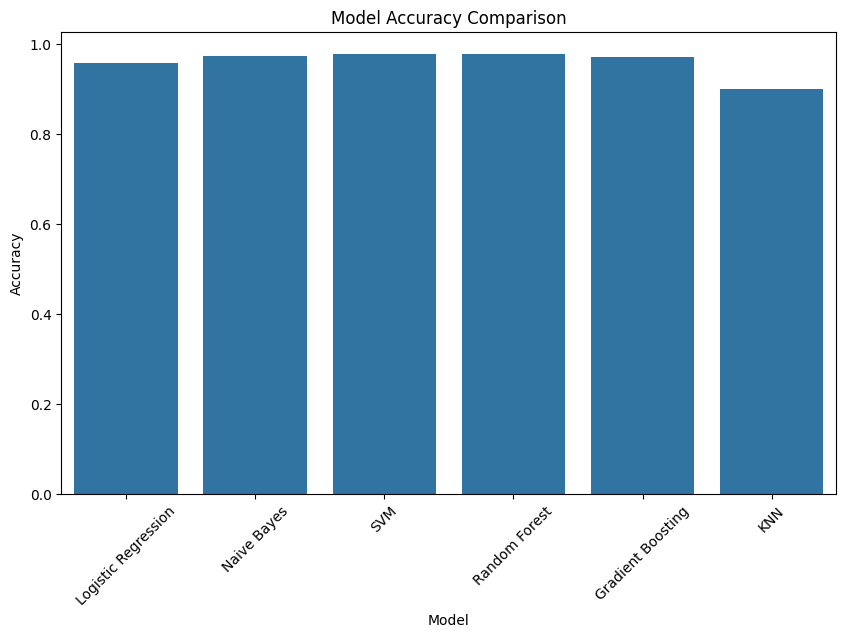

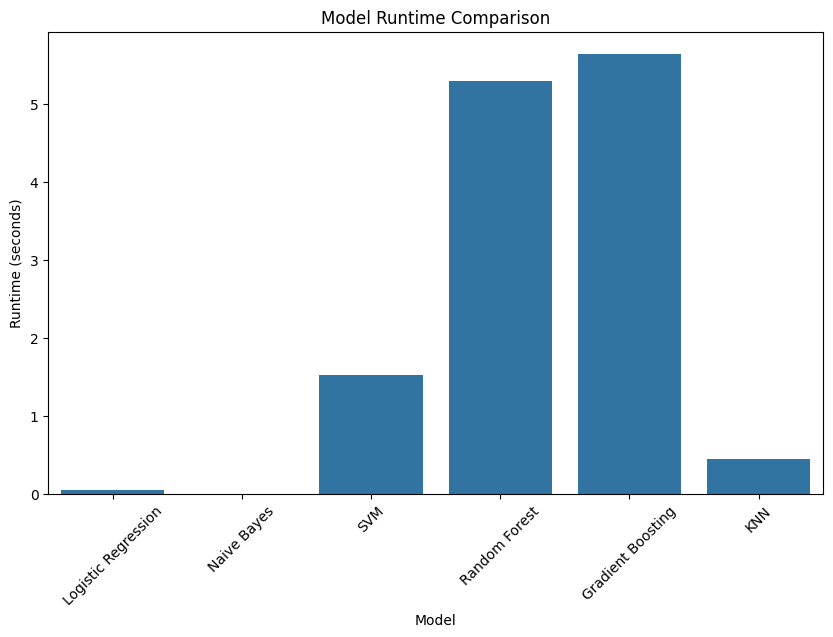

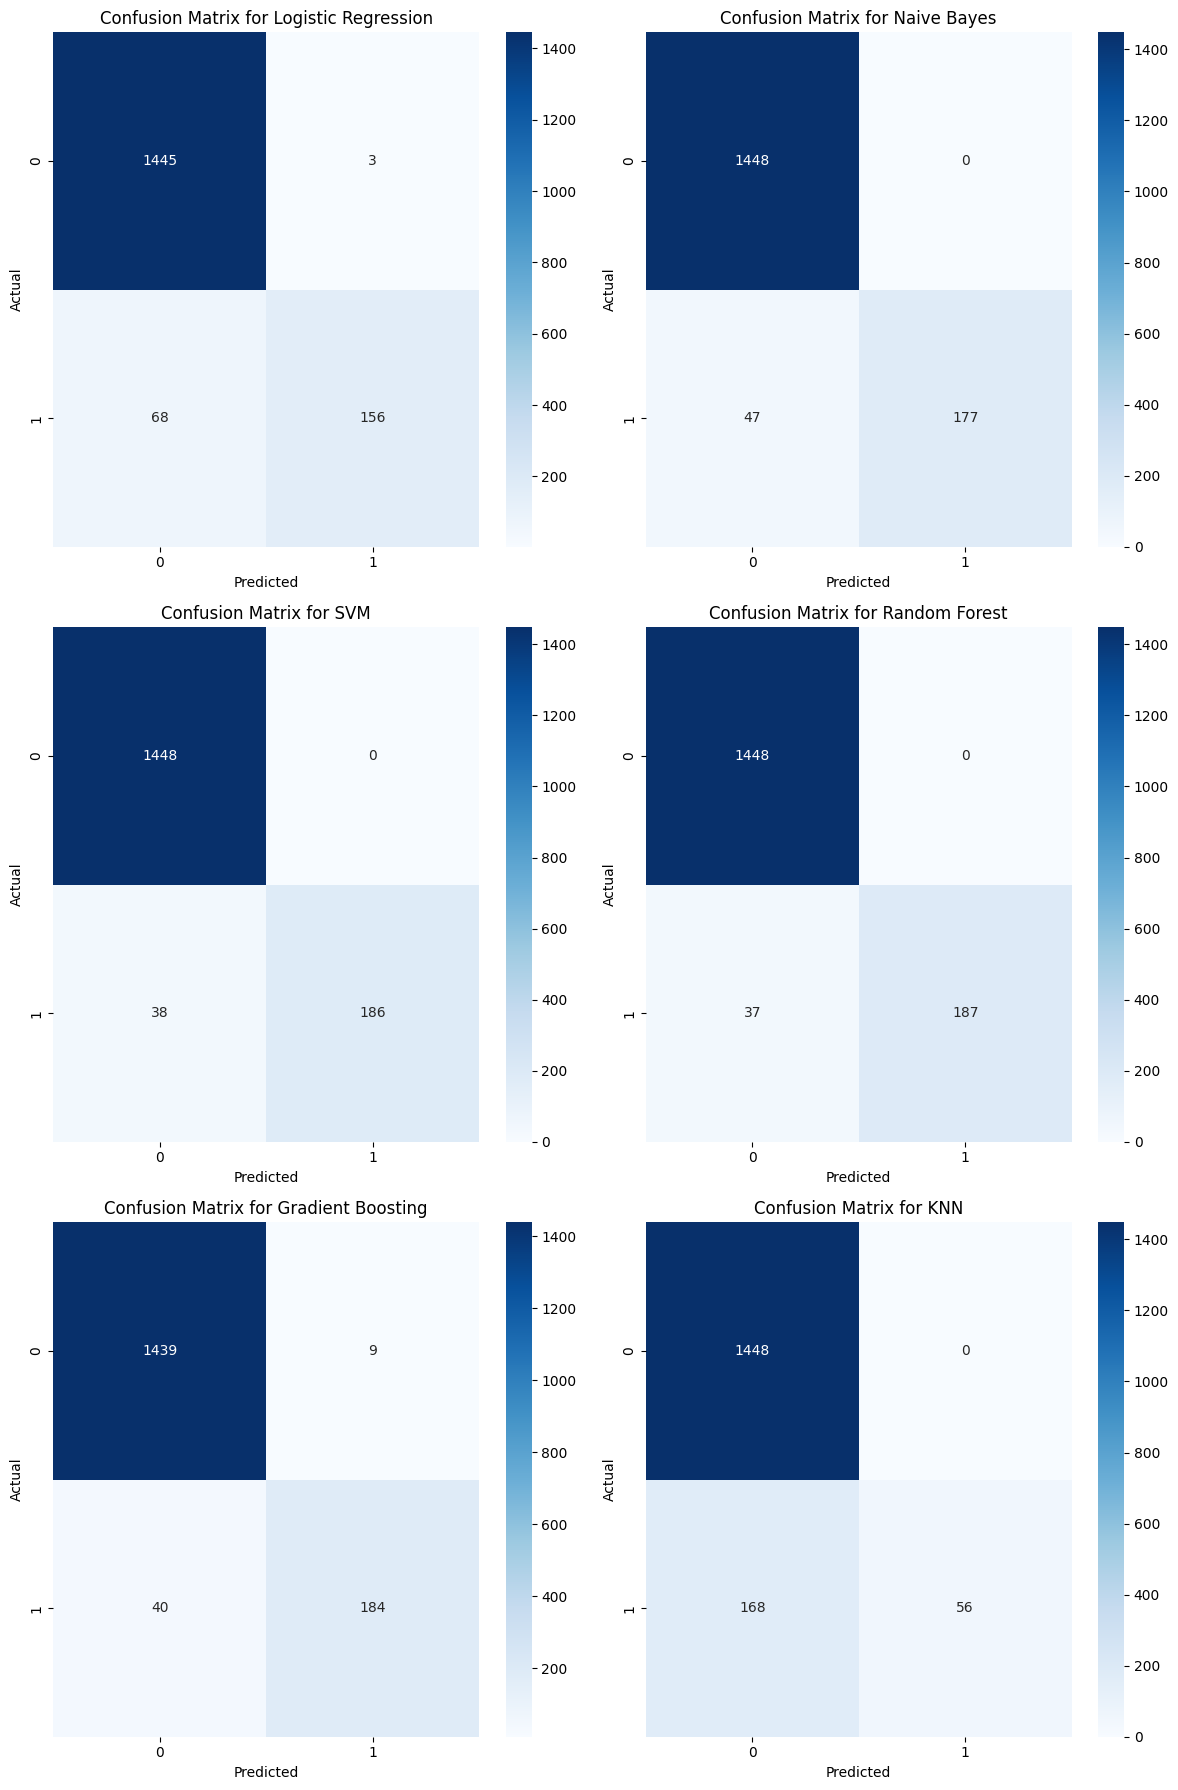

In [25]:
# Accuracy Visualization
accuracies = [result['accuracy'] for result in results.values()]
model_names = list(results.keys())

plt.figure(figsize=(10, 6))
sns.barplot(x=model_names, y=accuracies)
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.xticks(rotation=45)
plt.show()

# Runtime Visualization
runtimes = [result['runtime'] for result in results.values()]

plt.figure(figsize=(10, 6))
sns.barplot(x=model_names, y=runtimes)
plt.title('Model Runtime Comparison')
plt.ylabel('Runtime (seconds)')
plt.xlabel('Model')
plt.xticks(rotation=45)
plt.show()

# Confusion Matrix Visualization for each model
# Number of models
num_models = len(results)
num_rows = (num_models + 1) // 2  # Number of rows required for 2 columns

# Create subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=2, figsize=(12, num_rows * 6))
axes = axes.flatten()  # Flatten the axes array for easy iteration

for i, (name, result) in enumerate(results.items()):
    ax = axes[i]
    sns.heatmap(result['confusion_matrix'], annot=True, fmt='d', cmap='Blues', ax=ax)
    ax.set_title(f'Confusion Matrix for {name}')
    ax.set_ylabel('Actual')
    ax.set_xlabel('Predicted')

# Hide any unused subplots (in case of an odd number of models)
for j in range(num_models, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


Based on the results, SVM and Random Forest are the top performers in terms of accuracy, with both achieving around 97.7% accuracy. Naive Bayes also performed well, slightly behind at 97.2%. The runtime for SVM is longer than Naive Bayes, but still reasonable, while Random Forest has a longer runtime compared to the others.

### Evaluation

#### Cross-Validating the top models

In [22]:
from sklearn.model_selection import cross_val_score

# Define models
models = {
    'Logistic Regression': LogisticRegression(),
    'Naive Bayes': MultinomialNB(),
    'SVM': SVC(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}

# Perform cross-validation
cv_scores = {}
for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    cv_scores[name] = scores
    print(f"{name} Cross-Validation Accuracy: {scores.mean():.4f} ± {scores.std():.4f}")


Logistic Regression Cross-Validation Accuracy: 0.9372 ± 0.0091
Naive Bayes Cross-Validation Accuracy: 0.9546 ± 0.0089
SVM Cross-Validation Accuracy: 0.9662 ± 0.0092
Random Forest Cross-Validation Accuracy: 0.9726 ± 0.0087
Gradient Boosting Cross-Validation Accuracy: 0.9649 ± 0.0080


Cross-validating does not improve the models apparently so we will discard it.

#### Ensemble with Naive Bayes, Logistic Regression, and SVM

Ensemble Model:
Accuracy: 0.9713
Runtime: 1274.7743 seconds
Confusion Matrix:
[[1448    0]
 [  48  176]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1448
           1       1.00      0.79      0.88       224

    accuracy                           0.97      1672
   macro avg       0.98      0.89      0.93      1672
weighted avg       0.97      0.97      0.97      1672



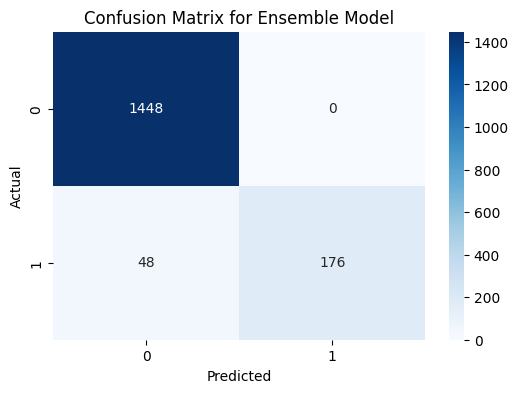

In [23]:
from sklearn.ensemble import VotingClassifier

# Ensemble Model
ensemble_model = VotingClassifier(estimators=[
    ('nb', MultinomialNB()),
    ('lr', LogisticRegression()),
    ('svm', SVC())
], voting='hard')

# Train and evaluate the ensemble
ensemble_model.fit(X_train, y_train)
y_pred_ensemble = ensemble_model.predict(X_test)

# Evaluate Ensemble
ensemble_accuracy = accuracy_score(y_test, y_pred_ensemble)
ensemble_conf_matrix = confusion_matrix(y_test, y_pred_ensemble)
ensemble_class_report = classification_report(y_test, y_pred_ensemble)
ensemble_runtime = time.time() - start_time

print("Ensemble Model:")
print(f"Accuracy: {ensemble_accuracy:.4f}")
print(f"Runtime: {ensemble_runtime:.4f} seconds")
print(f"Confusion Matrix:\n{ensemble_conf_matrix}")
print(f"Classification Report:\n{ensemble_class_report}")

# Visualize Ensemble Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(ensemble_conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Ensemble Model')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


#### Comparison with best performing model

In [24]:
# List of best performing models
best_models = {
    'Naive Bayes': {
        'model': models['Naive Bayes'],
        'accuracy': 0.9719  # Replace with actual accuracy
    },
    'Logistic Regression': {
        'model': models['Logistic Regression'],
        'accuracy': 0.9575  # Replace with actual accuracy
    },
    'SVM': {
        'model': models['SVM'],
        'accuracy': 0.9773  # Replace with actual accuracy
    }
}

# Compare accuracies
best_model_name = max(best_models, key=lambda k: best_models[k]['accuracy'])
print(f"Best Individual Model: {best_model_name} with Accuracy: {best_models[best_model_name]['accuracy']:.4f}")

if ensemble_accuracy > best_models[best_model_name]['accuracy']:
    print("The Ensemble Model performs better than the best individual model.")
else:
    print(f"The best individual model remains: {best_model_name}")


Best Individual Model: SVM with Accuracy: 0.9773
The best individual model remains: SVM


## 8. Results

### Final Result

- Best Individual Model: SVM with an accuracy of 0.9773.

- Ensemble Model: The ensemble of Naive Bayes, Logistic Regression, and SVM did not outperform the SVM model.

### Challenges

- **Cross-Validation Performance**: Cross-validation did not improve model performance in this case, leading to the decision to forgo it for final evaluation.
- **Model Runtime**: Some models, such as Random Forest and Gradient Boosting, had significantly longer runtimes, impacting their practicality for deployment in real-time scenarios.

### Future Work

- **Model Tuning**: Further hyperparameter tuning and optimization of the SVM model could be explored to potentially enhance performance.
- **Data Augmentation**: Exploring additional features or data augmentation techniques might improve model robustness and accuracy.
- **Deployment**: Considering deploying the best-performing model (SVM) in a real-world application for spam email classification.